In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("mortalidad_materna_2002-2016.csv")

In [5]:
# Data sanitization (ASUMIENDO que 0 en Razón Mortalidad Materna implica que es irrelevante el dato)
df = df[df['Razón de mortalidad materna'] == 1]

### ¿Cuál es el estado con la mayor cantidad de muertes maternas del país?

In [6]:
grp = df.groupby('Descripción de la entidad de ocurrencia').size()
max_state = grp.nlargest(1)
print('El estado de', max_state.index[0], 'es el mayor con un total de', max_state[0], 'muertes maternas')

El estado de México es el mayor con un total de 1725 muertes maternas


### Gráfica la mortalidad materna por Edad

Text(0,0.5,'# de Muertes')

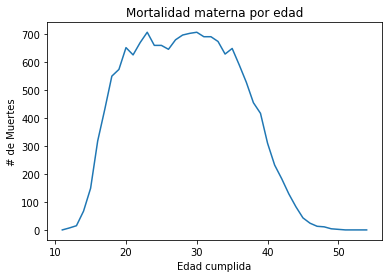

In [8]:
grp = df.groupby('Edad cumplida').size()
grp = grp[:-1]  # Ultima fila excluida por edad n/d

grafica = grp.plot(title='Mortalidad materna por edad')
grafica.set_ylabel('# de Muertes')

### Variables en el conjunto de datos que muestren un grado de correlación 

In [9]:
corr_vars = df.corr().abs()
s = corr_vars.unstack()
so = s.sort_values(kind="quicksort").dropna().drop_duplicates()
so = so[so.values != 1]  # Delete redundant values

max_vars = so.index[-1]
max_corr = round(so[-1] * 100, 2)
print(max_vars[0], 'y', max_vars[1], 'son las variables con mayor correlación ({}%)'.format(max_corr))

Entidad de ocurrencia y Entidad de registro son las variables con mayor correlación (99.7%)


### Problemas que presenta el conjunto de datos, ¿Qué recomendaciones le darías a los miembros del equipo?

###### Eliminar datos redundantes, existe una gran cantidad de columnas que son -para fines prácticos- inútiles o que generan información inútil y/o duplicada. Por ejemplo, se mantienen claves y descripciones de más detalladas de esas claves en Tamaño de localidad, Municipio de residencia, Causa de CIE, etc. 
###### Asimismo, se necesita normalizar los datos, se puede eficientizar la búsqueda de datos si se manntuvieran datos de nacimiento y defunción en formato DateTime (por nombrar un ejemplo). Aunque estoy seguro que tomó tiempo realizar el trabajo de recopilar estos datos, existen columnas sin propósito concebible como Año de la BDD, fecha de registro y certificación, entre otros.

### ¿Cuál es la variable que más afecta a la mortalidad materna?

###### Creo que no existe ninguna variable particularmente influyente (de otra manera ya se hubiera reducido la tasa de mortalidad), sin embargo, los datos presentan un sesgo hacia mujeres que no contaban con Derechohabiencia, por lo que se podría argumentar que esta variable tiene una influencia evidente. 
###### No obstante, se necesitaría comparar y relacionar información adicional de mujeres con partos exitosos y ver que factores contribuyeron en cada parto.

In [11]:
df.groupby('Descrición de la derechiahabiencia').size()

Descrición de la derechiahabiencia
DERECHOHABIENCIA NO ESPECIFICADA     1367
IMSS                                 2867
IMSS Oportunidades                    101
ISSSTE                                504
NINGUNA                              6374
OTRA                                  281
PEMEX                                  30
SECRETARIA DE LA DEFENSA NACIONAL      71
SECRETARIA DE MARINA                   87
SEGURO POPULAR                       4256
dtype: int64